In [44]:
import numpy as np
from Helper_Files.gradient_values_hlpr import hlpr_fun
%run "elegant_plot.ipynb" 

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [66]:
fig_save_path = r'\\storage01.amolf.nl\data\AMOLF\users\singh\Martin\Evolutionary Design'\
                r'\Thesis Chapter\Chapter 2.0\Figures'

In [13]:
import re
Tilings = np.zeros((101, 12, 2))
     
data_dir = r"\\storage01\data\AMOLF\users\singh\Lisa PSO Runs"\
            r"\New - MSE Cost Function\Horizontal Target Curve\Weight - 0.25"
    
str_ = "%02d"%(6)
file = data_dir + '\RunPso_c50_s275_r'+str_+'.out'
fp = open(file)
for j, line in enumerate(fp):
                
                if(j >= 1549 and (j-1549)%1534 >= 0 and (j-1549)%1534 <= 11):
                        
                        test = re.split(r'\t+', line)
                        temp = int((j-1549)/1534)
                        
                        if(temp == 0):
                            Tilings[temp+1, ((j-1549)%((temp+1)*1534)), 0] = float(test[0])
                            Tilings[temp+1, ((j-1549)%((temp+1)*1534)), 1] = float(test[1])

                        else:
                            Tilings[temp+1, ((j-1549)%((temp)*1534)), 0] = float(test[0])
                            Tilings[temp+1, ((j-1549)%((temp)*1534)), 1] = float(test[1])

tilings = Tilings/4  

best_fitness = np.zeros((101,1))

fp = open(file)
for i,line in enumerate(fp):
      if(i==9 or (i-1547)%1534 == 0):
            temp = re.split(r':', line)
            if(i==13):
                best_fitness[0,0] = temp[1]
            elif((i-1543)/1534 < 100):
                best_fitness[(i-1547)/1534+1,0] = temp[1]                            

C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:35: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


array([[-5.80093806,  4.9659419 ],
       [-1.81035993,  8.68625514],
       [ 1.68130035,  7.96454413],
       [ 6.75401396,  2.15916603],
       [ 5.45783478, -2.95716657],
       [ 2.82450206, -5.96759718],
       [-3.10989766, -6.10745611],
       [-5.76536236, -3.55699339],
       [-3.17056878, -0.62011518],
       [ 0.42523451,  5.19883481],
       [ 4.49013908, -1.05822514],
       [ 1.61197747, -2.85871081]])

array([[-5.80093806,  4.9659419 ],
       [-1.81035993,  8.68625514],
       [ 1.68130035,  7.96454413],
       [ 6.75401396,  2.15916603],
       [ 5.45783478, -2.95716657],
       [ 2.82450206, -5.96759718],
       [-3.10989766, -6.10745611],
       [-5.76536236, -3.55699339],
       [-3.17056878, -0.62011518],
       [ 0.42523451,  5.19883481],
       [ 4.49013908, -1.05822514],
       [ 1.61197747, -2.85871081]])

In [23]:
perturbed_objfunval = np.zeros((101,1000))

eps = 1e-3
for gen in range(1,101):
    rescale_num  =  best_fitness[gen]
    initPosition =  tilings[gen]
    rescale_deno =  hlpr_fun(initPosition)
    
    
    for count_ in range(1000):    
            random_perturb = 2*(0.50 - np.random.rand(12,2))
            perturbed_position = initPosition + (eps*random_perturb)
            perturbed_objfunval[gen, count_] =  hlpr_fun(perturbed_position)[0]*(rescale_num / rescale_deno[0]) 
    val = perturbed_objfunval[gen,:]
    print(gen,'||',len(val[val < best_fitness[gen]]))      

1 || 491
2 || 524
3 || 491
4 || 516
5 || 473
6 || 488
7 || 510
8 || 490
9 || 498
10 || 492
11 || 496
12 || 483
13 || 455
14 || 502
15 || 502
16 || 472
17 || 499
18 || 495
19 || 519
20 || 492
21 || 487
22 || 483
23 || 635
24 || 497
25 || 493
26 || 477
27 || 459
28 || 460
29 || 479
30 || 470
31 || 486
32 || 415
33 || 341
34 || 191
35 || 204
36 || 193
37 || 189
38 || 182
39 || 238
40 || 249
41 || 266
42 || 90
43 || 41
44 || 109
45 || 21
46 || 23
47 || 42
48 || 45
49 || 33
50 || 23
51 || 16
52 || 27
53 || 39
54 || 75
55 || 70
56 || 153
57 || 156
58 || 147
59 || 59
60 || 63
61 || 22
62 || 79
63 || 82
64 || 70
65 || 2
66 || 5
67 || 4
68 || 6
69 || 2
70 || 2
71 || 3
72 || 6
73 || 6
74 || 5
75 || 1
76 || 1
77 || 2
78 || 0
79 || 1
80 || 0
81 || 1
82 || 0
83 || 1
84 || 1
85 || 0
86 || 0
87 || 0
88 || 1
89 || 1
90 || 0
91 || 0
92 || 0
93 || 0
94 || 0
95 || 0
96 || 0
97 || 0
98 || 0
99 || 0
100 || 0


In [106]:
import colormaps as cmaps
plt.register_cmap(name='viridis', cmap=cmaps.viridis)

cmap = cmaps.viridis
import matplotlib as mpl
norm = mpl.colors.LogNorm(vmin=1, vmax=600)

In [77]:
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\ma\core.py:4085: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")
C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\colors.py:584: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)
C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


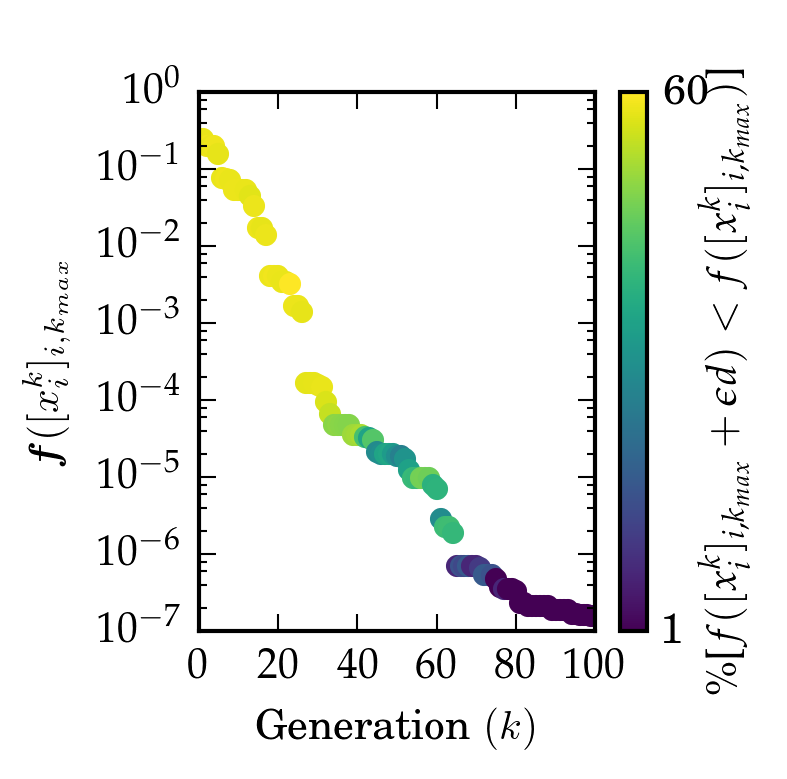

In [107]:
#plt.figure(1)
#plt.semilogy(best_fitness)
halffig()
for count in range(1,101):
    val = perturbed_objfunval[count,:]
    #print(len(val[val < best_fitness[count]]))
    plt.semilogy(count, best_fitness[count], 'o'
                 , color = cmap(norm(len(val[val < best_fitness[count]]))), 
                 markeredgecolor = cmap(norm(len(val[val < best_fitness[count]]))), markersize = 5)

h = plt.scatter([-100], [-100], c=[1], cmap = cmaps.viridis, norm=norm)
cb = colorbar(h)
cb.set_ticks([ 1, 600]); cb.set_ticklabels([ '1', '60'])
cb.set_label(r'$\%$[$\boldsymbol{f}([x_i^k]_{i,k_{max}} + \epsilon d) < \boldsymbol{f}([x_i^k]_{i,k_{max}})$]', labelpad =0)

plt.xlim([0,100])
plt.ylabel(r'$\boldsymbol{f}([x_i^k]_{i,k_{max}}$'   )
plt.xlabel(r'Generation $(k)$')

plt.savefig(fig_save_path + r'\convergence_curve_local_min.pdf', format='pdf',bbox_inches='tight')
plt.show()

(-5, 60)

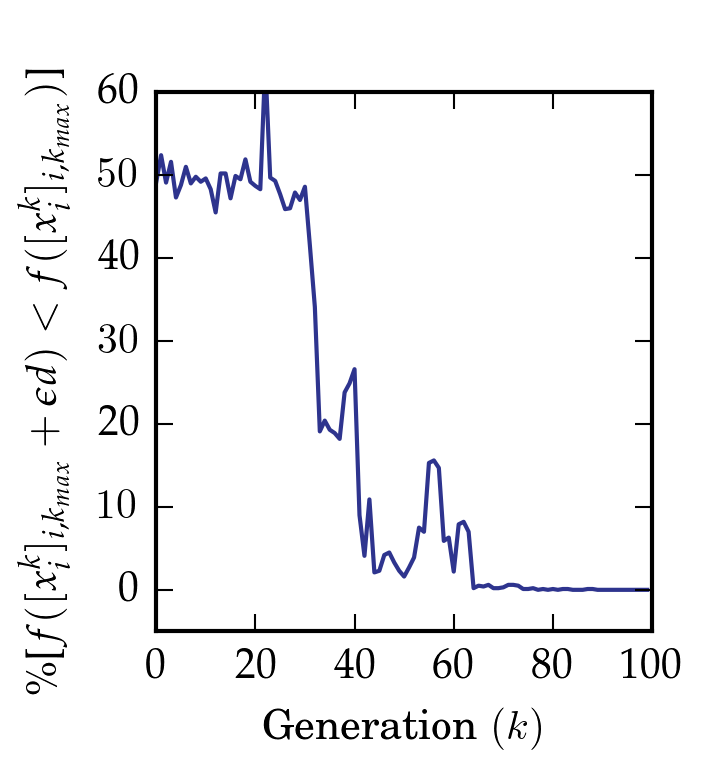

In [115]:
neg_pert = np.zeros((101,1))
for count in range(1,101):
    val = perturbed_objfunval[count,:]
    neg_pert[count] = len(val[val < best_fitness[count]])
halffig()
plt.plot(neg_pert[1:]/10, color = '#2E348E')

plt.ylabel(r'$\%$[$\boldsymbol{f}([x_i^k]_{i,k_{max}} + \epsilon d) < \boldsymbol{f}([x_i^k]_{i,k_{max}})$]')
plt.xlabel(r'Generation $(k)$')
plt.savefig(fig_save_path + r'\convergence_curve_neg_pert.pdf', format='pdf',bbox_inches='tight')

plt.ylim([-5,60])

In [30]:
from matplotlib import pyplot as plt
for count in range(1,101):
    val = perturbed_objfunval[count,:]
    #print(len(val[val < best_fitness[count]]))
    plt.plot(count, len(val[val < best_fitness[count]]), 'o')
    
plt.show()    

In [28]:
best_cost_grid = np.load(r"\\storage01\data\AMOLF\users\singh\Lisa PSO Runs\New - MSE Cost Function"\
                         r"\Horizontal Target Curve\Weight - 0.25\Data\best_cost_grid.npy")
best_cost_grid_copy = np.copy(best_cost_grid)



min_index_arr = np.zeros((24,3), dtype = int)

for count in range(24):
    i,j,k = np.where(best_cost_grid_copy == best_cost_grid_copy.min())
    best_cost_grid_copy[i , j, k] = 1000
    min_index_arr[count, 0] = i[0] 
    min_index_arr[count, 1] = j[0]
    min_index_arr[count, 2] = k[0]
min_index_arr    

array([[ 6, 11,  2],
       [53, 10,  0],
       [10, 11,  0],
       [85,  8,  3],
       [42,  7,  5],
       [30,  9,  3],
       [97, 10,  0],
       [99, 10,  0],
       [65,  9,  1],
       [59,  8,  6],
       [41,  5,  7],
       [43, 10,  1],
       [49,  6,  6],
       [63, 10,  0],
       [57, 11,  0],
       [10,  7,  2],
       [84,  9,  1],
       [87,  7,  1],
       [19,  8,  1],
       [71, 10,  3],
       [60, 11,  0],
       [25, 10,  0],
       [42, 14,  0],
       [31,  5,  3]])

In [43]:
best_cost_grid[6,11,2]

1.5812221538748399e-07

In [111]:
neg_pert[1:]/10

array([[ 49.1],
       [ 52.4],
       [ 49.1],
       [ 51.6],
       [ 47.3],
       [ 48.8],
       [ 51. ],
       [ 49. ],
       [ 49.8],
       [ 49.2],
       [ 49.6],
       [ 48.3],
       [ 45.5],
       [ 50.2],
       [ 50.2],
       [ 47.2],
       [ 49.9],
       [ 49.5],
       [ 51.9],
       [ 49.2],
       [ 48.7],
       [ 48.3],
       [ 63.5],
       [ 49.7],
       [ 49.3],
       [ 47.7],
       [ 45.9],
       [ 46. ],
       [ 47.9],
       [ 47. ],
       [ 48.6],
       [ 41.5],
       [ 34.1],
       [ 19.1],
       [ 20.4],
       [ 19.3],
       [ 18.9],
       [ 18.2],
       [ 23.8],
       [ 24.9],
       [ 26.6],
       [  9. ],
       [  4.1],
       [ 10.9],
       [  2.1],
       [  2.3],
       [  4.2],
       [  4.5],
       [  3.3],
       [  2.3],
       [  1.6],
       [  2.7],
       [  3.9],
       [  7.5],
       [  7. ],
       [ 15.3],
       [ 15.6],
       [ 14.7],
       [  5.9],
       [  6.3],
       [  2.2],
       [  7.9],
       [

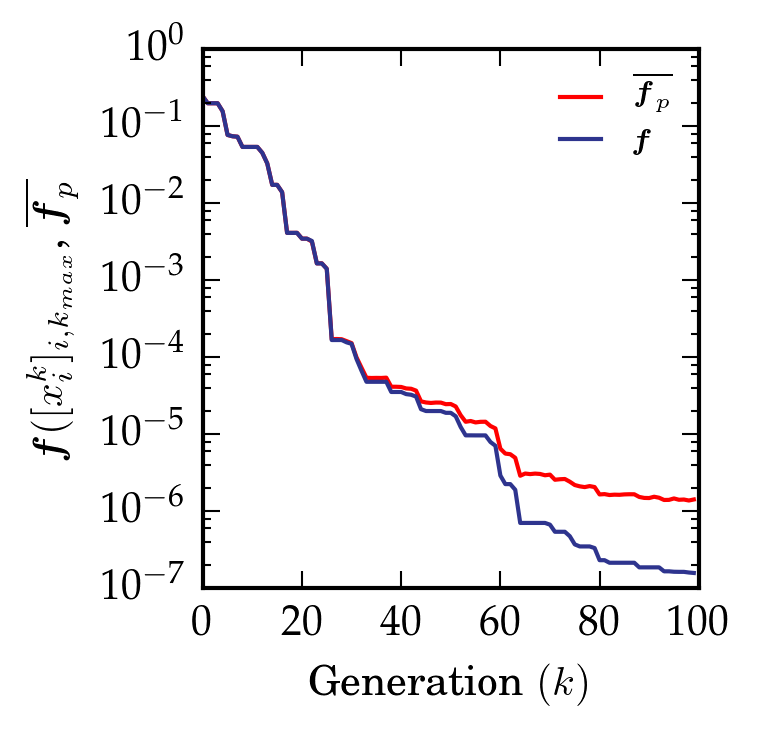

In [146]:
halffig()
plt.semilogy(np.mean(perturbed_objfunval[1:], axis = 1), color = 'red', label = r'$\overline{\boldsymbol{f}_p}$')
plt.plot(best_fitness[1:], color = '#2E348E', label = r'$\boldsymbol{f}$')
#plt.plot(np.mean(perturbed_objfunval[1:], axis = 1) - best_fitness_array[1:])
plt.xlabel(r'Generation $(k)$')
plt.ylabel(r'$\boldsymbol{f}([x_i^k]_{i,k_{max}}$, $\overline{\boldsymbol{f}_p}$')
plt.legend(frameon = False, prop={'size':7})
plt.savefig(fig_save_path + r'\convergence_curve_mean_pert.pdf', format='pdf',bbox_inches='tight')


# np.mean(perturbed_objfunval[1:], axis = 1) 

In [132]:
best_fitness_array = np.zeros((101,))
for count in range(101):
    best_fitness_array[count] = best_fitness[count][0]
best_fitness_array

array([  2.44187149e-01,   2.44187149e-01,   1.98514841e-01,
         1.98514841e-01,   1.98514841e-01,   1.56446976e-01,
         7.69412914e-02,   7.39662928e-02,   7.30091313e-02,
         5.37794621e-02,   5.37794621e-02,   5.37794621e-02,
         5.37794621e-02,   4.50964076e-02,   3.28842887e-02,
         1.73018549e-02,   1.73018549e-02,   1.39069739e-02,
         4.11986062e-03,   4.11986062e-03,   4.11986062e-03,
         3.46324562e-03,   3.46324562e-03,   3.23318178e-03,
         1.65219147e-03,   1.65219147e-03,   1.40676662e-03,
         1.67300171e-04,   1.67300171e-04,   1.67300171e-04,
         1.56138149e-04,   1.49295234e-04,   9.48573575e-05,
         6.69290802e-05,   4.80123848e-05,   4.80123848e-05,
         4.80123848e-05,   4.80123848e-05,   4.80123848e-05,
         3.53948763e-05,   3.53948763e-05,   3.53948763e-05,
         3.32215716e-05,   3.25737696e-05,   3.08784168e-05,
         2.11670927e-05,   2.00318668e-05,   2.00208925e-05,
         2.00208925e-05,

In [130]:
halffig()
plt.semilogy(np.mean(perturbed_objfunval[1:], axis = 1), color = 'red', label = r'$\overline{\boldsymbol{f}_p}$')
plt.plot(best_fitness[1:], color = '#2E348E', label = r'$\boldsymbol{f}$')
#plt.plot(np.mean(perturbed_objfunval[1:], axis = 1) - best_fitness_array[1:])
plt.xlabel(r'Generation $(k)$')
plt.ylabel(r'$\boldsymbol{f}([x_i^k]_{i,k_{max}}$, $\overline{\boldsymbol{f}_p}$')
plt.legend(frameon = False, prop={'size':7})
plt.savefig(fig_save_path + r'\convergence_curve_mean_pert.pdf', format='pdf',bbox_inches='tight')

1.5812221538748399e-07